In [113]:
from sklearn.tree         import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble     import RandomForestClassifier

# SVM add
from sklearn.svm          import SVC

# knn add
from sklearn.neighbors    import KNeighborsClassifier

# ensemble add
from sklearn.ensemble     import VotingClassifier
from sklearn.ensemble     import RandomForestClassifier

from sklearn.preprocessing   import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler , Binarizer 
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve , roc_curve

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as ms
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# datasets
from sklearn.datasets import load_breast_cancer

# XGBoost
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

In [114]:
# AUC 성능평가 확인

def metrics_evaluation(y_test, y_pred=None , y_pred_proba=None) :
    print("정확도 : {} , 정밀도 : {} , 재현율 : {} , 조화평균(F1) : {} , AUC : {} "
          .format(accuracy_score(y_test, y_pred) , 
                  precision_score(y_test, y_pred) , 
                  recall_score(y_test, y_pred) , 
                  f1_score(y_test, y_pred) , 
                  roc_auc_score(y_test, y_pred_proba) ) )

#### Lineare Regression

- f(x) = wx + b
- 예측 함수를 통해서 예측값과 실제값의 차이를 계산
- cost(w, b) : 업데이트를 통해서 w,b 값을 조정한다
- 위 과정을 특정 횟수만큼 반복
- 수정된 값을 통해서 f(x) = wx + b 정의한다

- 독립변수 (feature), 종속변수(target)
- 독립변수의 갯수에 따라서 : 단일회귀, 다중회귀

In [10]:
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as ms
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [115]:
df = pd.DataFrame({
'height': [1.47, 1.50, 1.52, 1.55, 1.57, 1.60, 1.63, 1.65, 1.68, 1.70, 1.73, 1.75, 1.78, 1.80, 1.83],
'mass': [52.21, 53.12, 54.48, 55.84, 57.20, 58.57, 59.93, 61.29, 63.11, 64.47, 66.28, 68.10, 69.92, 72.19, 74.46],
})


In [116]:
df

,height,mass
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


In [19]:
# 독립변수
X = df[['height']]
X

,height
0,1.47
1,1.50
2,1.52
3,1.55
4,1.57
5,1.60
6,1.63
7,1.65
8,1.68
9,1.70


In [20]:
# 종속변수
Y = df['mass']
Y

0     52.21
1     53.12
2     54.48
3     55.84
4     57.20
5     58.57
6     59.93
7     61.29
8     63.11
9     64.47
10    66.28
11    68.10
12    69.92
13    72.19
14    74.46
Name: mass, dtype: float64

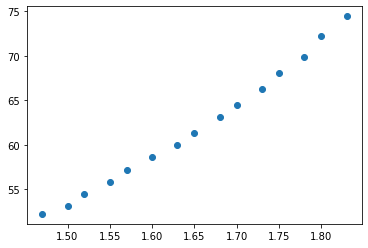

In [21]:
plt.figure()

plt.plot(X, Y, 'o')

plt.show()
plt.close()

In [22]:
test_model = LinearRegression()
test_model.fit (X, Y)

LinearRegression()

In [26]:
# 예측 키 넣어서
test_model.predict([[1.77]])

array([69.38981426])

In [30]:
# 기울기
print ('coefficient =', test_model.coef_)

# 절편
print ('intercept =' , test_model.intercept_)

coefficient = [61.27218654]
intercept = -39.061955918843935


In [31]:
( 61.27218654 * 1.77) -39.061955918843935

69.38981425695607

In [32]:
# 결정계수 R
print('R = ', test_model.score(X,Y))

R =  0.9891969224457968


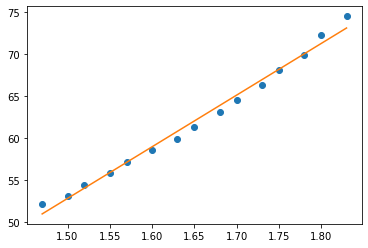

In [34]:
plt.figure()

plt.plot(X, Y, 'o')
plt.plot(X, test_model.predict(X))

plt.show()
plt.close()

In [92]:
tempDF = pd.read_csv('https://raw.githubusercontent.com/jmnote/z-dataset/master/simple-regression/iced-tea-orders.csv')
tempDF

,date,weekday,high_temperature,order
0,2002-07-22,Mon,29,77
1,2002-07-23,Tue,28,62
2,2002-07-24,Wed,34,93
3,2002-07-25,Thr,31,84
4,2002-07-26,Fri,25,59
5,2002-07-27,Sat,29,64
6,2002-07-28,Sun,32,80
7,2002-07-29,Mon,31,75
8,2002-07-30,Tue,24,58
9,2002-07-31,Wed,33,91


In [93]:
# 독립변수
X = tempDF[['high_temperature']]
X

,high_temperature
0,29
1,28
2,34
3,31
4,25
5,29
6,32
7,31
8,24
9,33


In [94]:
# 종속변수
Y = tempDF['order']
Y

0     77
1     62
2     93
3     84
4     59
5     64
6     80
7     75
8     58
9     91
10    51
11    73
12    65
13    84
Name: order, dtype: int64

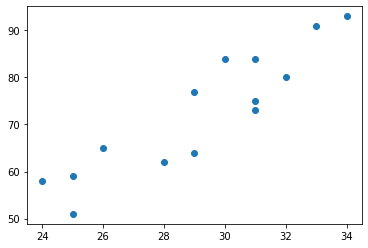

In [95]:
plt.figure()

plt.plot(X, Y, 'o')

plt.show()
plt.close()

In [96]:
test_model = LinearRegression()
test_model.fit (X, Y)

LinearRegression()

In [97]:
# 예측 온도 넣어서
test_model.predict([[30]])

array([75.7753304])

In [98]:
# 기울기
print ('coefficient =', test_model.coef_)

# 절편
print ('intercept =' , test_model.intercept_)

coefficient = [3.73788546]
intercept = -36.36123348017618


In [99]:
# 결정계수 R
print('R = ', test_model.score(X,Y))

R =  0.8225092881166945


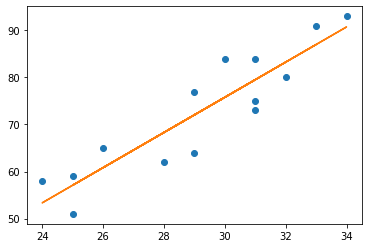

In [100]:
plt.figure()

plt.plot(X, Y, 'o')
plt.plot(X, test_model.predict(X))

plt.show()
plt.close()

#### 주택 임대료 예측 모델

- manhattan.csv

In [101]:
houseDF = pd.read_csv('./data/manhattan.csv')
houseDF.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [102]:
X = houseDF [['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck']]

In [103]:
Y = houseDF['rent']

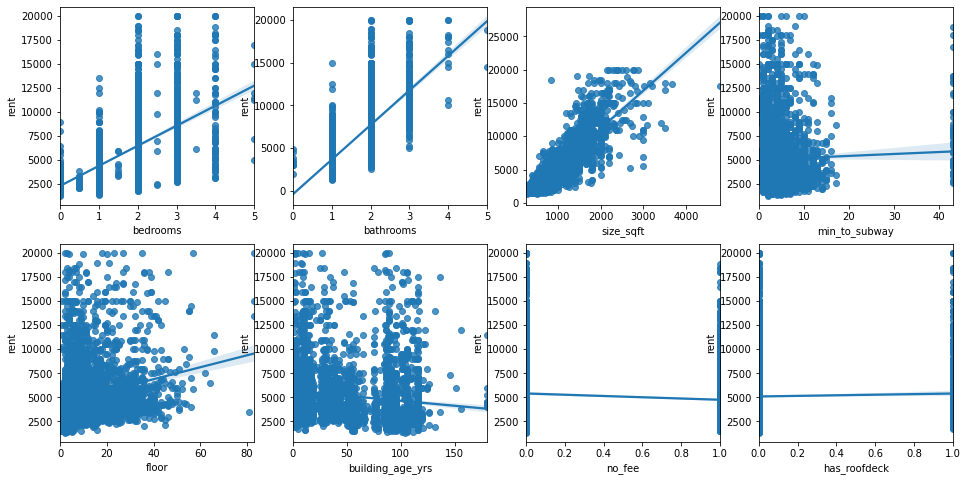

In [104]:
fig, axs = plt.subplots(figsize =(16,8),
                       ncols = 4,
                       nrows = 2)
for i, feature in enumerate(X):
    row = int(i/4)
    col = i%4
    sns.regplot(x = feature, y='rent', data = houseDF , ax = axs[row][col] )

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=.2,
                                                   random_state = 100)

In [106]:
price_model = LinearRegression()
price_model.fit (X_train, y_train)

LinearRegression()

In [107]:
# ['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck']
my_apt= [2,          1,          620,            10,         11,          5,               0,           0 ]

In [108]:
y_pred = price_model.predict([my_apt])
y_pred

array([3243.81895511])

In [109]:
y_pred = price_model.predict(X_test)
y_pred

array([ 3840.64309488,  3360.24914009,  4323.02145803,  2061.95605844,
        3756.18526504,  2632.04506095, 13224.56329548,  2555.12699916,
        5953.4257522 ,  4059.95244586,  4115.47339142,  7660.00928729,
        6059.04875514,  2573.80323417, 11397.0245667 ,  5822.40521776,
        1727.38071303,  3349.33670525,  3504.23594981,  2687.77343033,
        9529.88637798,  3520.8536494 ,  2018.54028461,  5066.47785641,
        8084.44215755,  4096.70936032,  3706.35740495,  3795.98037355,
        2382.75733216,  7530.71590682,  5053.1661762 ,  6880.73452448,
        3829.61760117,  7013.7111041 ,  6165.08522042,  7894.52115911,
        3951.56904647,  1880.95128518,  2935.01856899,  6400.71493297,
        8359.60527956,  4011.05552304,  2636.03055238,  5025.50377856,
        5846.79380424,  3730.08636179,  2297.39863446,  8426.57413273,
        4891.18837622, 11581.03933096,  3654.96382471,  3495.93355771,
        3795.98037355,  3813.41588245,  4261.30818193,  6189.14882042,
      

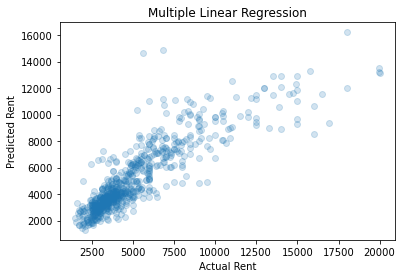

In [110]:
# x 실제 임대료 : y 예측 임대료
plt.scatter(y_test, y_pred, alpha=0.2)

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Multiple Linear Regression')

plt.show()
plt.close()


In [111]:
# 기울기
print ('coefficient =', test_model.coef_)

# 절편
print ('intercept =' , test_model.intercept_)

# 결정계수 R
print('R = ', test_model.score(X, Y))

coefficient = [3.73788546]
intercept = -36.36123348017618


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 8)

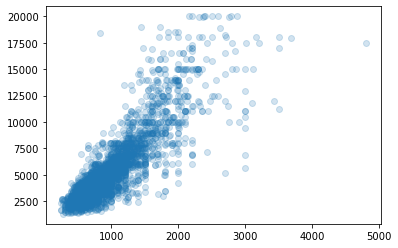

In [78]:
plt.scatter(houseDF[['size_sqft']], houseDF[['rent']], alpha=0.2)
plt.show()
plt.close()


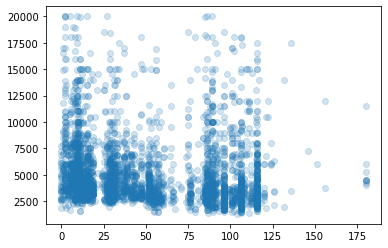

In [112]:
plt.scatter(houseDF[['building_age_yrs']], houseDF[['rent']], alpha=0.2)
plt.show()
plt.close()
